# Математическая и прикладная статистика
## Лабораторная работа
## Белоброцкий Денис Витальевич, Магистратура, 1 курс
### Вариант
Количество гласных букв = 10  
Количество согласных букв = 16  
Вариант = 06
### Исходный код
https://github.com/DenisBelobrotski/AppliedStatisticsLab


## Задание 1


### Модули


In [1]:
import math
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
# %matplotlib inline


### Чтение данных (data_1_var_06.txt)


In [2]:
data_file_name = "data_1_var_06.txt"

def parse_data(file_name):
    result_data = []
    result_data_len = 0
    all_data_parsed = False
    
    with open(file_name, "r") as file:
        numbers = file.read().split(",")
        numbers_len = len(numbers)
        for current in numbers:
            result_data.append(float(current.strip()))
        result_data_len = len(result_data)
        all_data_parsed = (numbers_len == result_data_len)
        
    return result_data, result_data_len, all_data_parsed
        
data, dataLen, allDataParsed = parse_data(data_file_name)

print("Parsed numbers count = " + str(dataLen))
print("Is all data parsed = " + str(allDataParsed))
sortedData = sorted(data)
    

Parsed numbers count = 345
Is all data parsed = True


### а) Выборочное среднее


In [34]:
def calc_sample_mean(in_data):
    in_data_len = len(in_data)
    mean_sum = 0.0
    for number in in_data:
        mean_sum += number
    return mean_sum / in_data_len

sampleMean = calc_sample_mean(data)
print("Sample mean = " + str(sampleMean))


Sample mean = 3.5859199999999984


### б) Выборочная дисперсия


In [35]:
def calc_variance_sum(in_data, mean):
    variance_sum = 0.0
    for number in in_data:
        variance_sum += (number - mean)**2
    return variance_sum

def calc_sample_variance(in_data, mean):
    in_data_len = len(in_data)
    return calc_variance_sum(in_data, mean) / in_data_len

sampleVariance = calc_sample_variance(data, sampleMean)
print("Sample variance = " + str(sampleVariance))


Sample variance = 1.2073530875130443


### в) Исправленная дисперсия


In [36]:
def calc_unbiased_sample_variance(in_data, mean):
    in_data_len = len(in_data)
    return calc_variance_sum(in_data, mean) / (in_data_len - 1)

unbiasedSampleVariance = calc_unbiased_sample_variance(data, sampleMean)
print("Unbiased sample variance = " + str(unbiasedSampleVariance))


Unbiased sample variance = 1.210862834860466


### г) Размах выборки


In [6]:
dataMin = sortedData[0]
dataMax = sortedData[-1]
dataRange = dataMax - dataMin
print("Min = " + str(dataMin))
print("Max = " + str(dataMax))
print("Range = " + str(dataRange))


Min = 0.6819
Max = 6.5951
Range = 5.913200000000001


### д) Медиана


In [7]:
median = sortedData[dataLen // 2]
if dataLen % 2 == 0:
    median += sortedData[dataLen // 2 - 1]
    median /= 2
    
print("Median = " + str(median))


Median = 3.5788


### е) Квартили


In [8]:
lowerQuartile = sortedData[dataLen // 4]
upperQuartile = sortedData[3 * dataLen // 4]

print("Q1 = " + str(lowerQuartile))
print("Q2 = " + str(median))
print("Q3 = " + str(upperQuartile))


Q1 = 2.8036
Q2 = 3.5788
Q3 = 4.3214


### ж) Выборочная квантиль уровня 1/3


In [9]:
quantile_1_3 = sortedData[dataLen // 3]

print("Q = " + str(quantile_1_3))


Q = 3.0461


### з) Гистограмма, полигон частот, плотность нормального распределения.  
PDF - Probability Density Function (Функция плотности распределения)


mu =  3.5859199999999984
sigma =  1.1003921277710351
hist bins count =  20


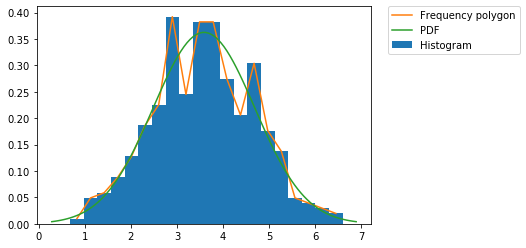

In [10]:
def norm_pdf(x, mu, sigma):
    return (1.0 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma)**2)

def norm_pdf_list(x, mu, sigma):
    result = x.copy()
    for i in range(len(x)):
        result[i] = norm_pdf(result[i], mu, sigma)

    return result

def draw_pdf(hist_bins_count, mu, sigma):
    n, bins, patches = plt.hist(data, hist_bins_count, density=True, label="Histogram")
    bins = np.delete(bins, -1)
    
    for i in range(hist_bins_count):
        bins[i] += patches[i].get_width() / 2
        
    plt.plot(bins, n, label="Frequency polygon")
    
    nodes_count = 100
    nodes = np.linspace(mu - 3 * sigma, mu + 3 * sigma, nodes_count)
    plt.plot(nodes, norm_pdf_list(nodes, mu, sigma), label="PDF")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)
    
    print("mu = ", str(mu))
    print("sigma = ", str(sigma))
    print("hist bins count = ", str(hist_bins_count))
    
draw_pdf(20, sampleMean, math.sqrt(unbiasedSampleVariance))


### и) Эмпирическая функция распределения и функция распределения нормального закона  
CDF - Cumulative distribution function (Теоритическая функция распределения)  
EDF - Empirical distribution function (Эмпирическая функция распределения)  


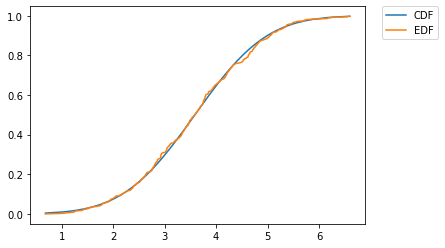

In [11]:
def norm_cdf(x, mu, sigma):
    return 0.5 * (1 + math.erf((x - mu) / (sigma * 1.4142)))

def norm_cdf_list(in_data, mu, sigma):
    out_data = in_data.copy()
    for i in range(len(out_data)):
        out_data[i] = norm_cdf(out_data[i], mu, sigma)
    return out_data

def edf(in_data):
    out_data = in_data.copy()
    out_data_len = len(out_data)
    for i in range(out_data_len):
        out_data[i] = i / out_data_len
    return out_data

def draw_cdf(mu, sigma):
    plt.plot(sortedData, norm_cdf_list(sortedData, mu, sigma), label="CDF")
    plt.plot(sortedData, edf(sortedData), label="EDF")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)

draw_cdf(sampleMean, math.sqrt(unbiasedSampleVariance))


### к) Доверительные интервалы для среднего и дисперсии с вероятностью 0.99


In [12]:

def confidence_interval_mean(mean, variance, data_len, probability):
    bias = math.sqrt(variance / (data_len - 1)) * stats.t.ppf(1 - probability / 2, data_len - 1)
    return mean - bias, mean + bias

def confidence_interval_variance(variance, data_len, probability):
    lower_bound = (data_len - 1) * variance / stats.chi2.ppf((1 + probability) / 2, data_len - 1)
    upper_bound = (data_len - 1) * variance / stats.chi2.ppf((1 - probability) / 2, data_len - 1)
    return lower_bound, upper_bound

print("Mean confidence interval = " + str(confidence_interval_mean(sampleMean, unbiasedSampleVariance, dataLen, 0.99)))
print("Sample mean = " + str(sampleMean))
print()
print("Variance confidence interval = " + str(confidence_interval_variance(unbiasedSampleVariance, dataLen, 0.99)))
print("Unbiased sample variance = " + str(unbiasedSampleVariance))


Mean confidence interval = (3.5851758590018594, 3.5866641409981375)
Sample mean = 3.5859199999999984

Variance confidence interval = (1.0029449329842604, 1.4865973537588315)
Unbiased sample variance = 1.210862834860466


## Задание 2


### а) Критерий Колмогорова (нормальное распределение со средним 10 и дисперсией 5.5). Уровень занчимости 0.05.


In [13]:
def kolmogorov_test_normal(sorted_data, mean, variance, quantile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    edf_result = edf(sortedData)
    
    max_distance = 0
    for i in range(data_len):
        # max_distance = max(max_distance, math.fabs(cdf_result[i] - edf_result[i]))
        max_distance = max(max_distance, math.fabs(cdf_result[i] - (i + 1) / data_len))
        
    result_statistics = math.sqrt(data_len) * max_distance
    return result_statistics, (result_statistics < quantile)
    
kolmogorov_test_normal_statistics, kolmogorov_test_normal_passed = \
    kolmogorov_test_normal(sortedData, 10.0, 5.5, 1.36)
print("Kolmogorov test:")
print("statistics = ", str(kolmogorov_test_normal_statistics))
print("quantile = ", str(1.36))
print("passed = ", str(kolmogorov_test_normal_passed))


Kolmogorov test:
statistics =  17.604856029131053
quantile =  1.36
passed =  False


### б) Критерий Крамера-Мизеса (нормальное распределение со средним 10 и дисперсией 5.5). Уровень занчимости 0.05.


In [14]:
def cramer_mises_test_normal(sorted_data, mean, variance, quntile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    
    result_statistics = 1 / (12 * data_len)
    for i in range(data_len):
        result_statistics += (cdf_result[i] - (2 * i + 1)/(2 * data_len))**2
    
    return result_statistics, (result_statistics < quntile)

cramer_mises_test_normal_statistics, cramer_mises_test_normal_passed = \
    cramer_mises_test_normal(sortedData, 10.0, 5.5, 0.46)
print("Cramer-Mises test:")
print("statistics = ", str(cramer_mises_test_normal_statistics))
print("quantile = ", str(0.46))
print("passed = ", str(cramer_mises_test_normal_passed))


Cramer-Mises test:
statistics =  111.35222279248605
quantile =  0.46
passed =  False


### в) Критерий Андерсон-Дарлинга (нормальное распределение со средним 10 и дисперсией 5.5). Уровень занчимости 0.05.


In [15]:
def anderson_darling_test_normal(sorted_data, mean, variance, quntile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    
    result_statistics = -data_len
    for i in range(data_len):
        coef = (2 * i + 1)/(2 * data_len)
        result_statistics += -2 * (coef * math.log(cdf_result[i]) + (1 - coef) * math.log(1 - cdf_result[i]))
    
    return result_statistics, (result_statistics < quntile)

anderson_darling_test_normal_statistics, anderson_darling_test_normal_passed = \
    anderson_darling_test_normal(sortedData, 10.0, 5.5, 0.46)
print("Anderson-Darling test:")
print("statistics = ", str(anderson_darling_test_normal_statistics))
print("quantile = ", str(2.49))
print("passed = ", str(anderson_darling_test_normal_passed))


Anderson-Darling test:
statistics =  1402.6543578852445
quantile =  2.49
passed =  False


### Чтение данных второй выборки (data_1_var_07.txt)


In [16]:
data2_file_name = "data_1_var_07.txt"
        
data2, data2Len, allData2Parsed = parse_data(data2_file_name)

print("Parsed numbers count = " + str(data2Len))
print("Is all data parsed = " + str(allData2Parsed))
sortedData2 = sorted(data2)


Parsed numbers count = 349
Is all data parsed = True


г) При помощи критерия хи-квадрат проверить гипотезу, что вторая выборка имеет нормальное распределение.


20
[0.0028653295128939827, 0.0, 0.0, 0.0, 0.0057306590257879654, 0.008595988538681949, 0.02865329512893983, 0.0659025787965616, 0.07736389684813753, 0.09169054441260745, 0.17191977077363896, 0.10601719197707736, 0.11174785100286533, 0.0830945558739255, 0.08595988538681948, 0.05157593123209169, 0.034383954154727794, 0.008595988538681949, 0.008595988538681949, 0.0028653295128939827]
[-0.7836, -0.393405, -0.003210000000000046, 0.386985, 0.7771799999999999, 1.1673749999999998, 1.5575700000000001, 1.947765, 2.33796, 2.7281549999999997, 3.1183499999999995, 3.508545, 3.89874, 4.2889349999999995, 4.67913, 5.069324999999999, 5.4595199999999995, 5.849715, 6.239909999999999, 6.6301049999999995]
[0.00367166 0.00734333 0.02937331 0.12850822 0.22397148 0.36349469
 0.25701645 0.18358318 0.06241828 0.02202998]
[-7.83600e-01 -3.21000e-03  7.77180e-01  1.55757e+00  2.33796e+00
  3.11835e+00  3.89874e+00  4.67913e+00  5.45952e+00  6.23991e+00
  7.02030e+00]


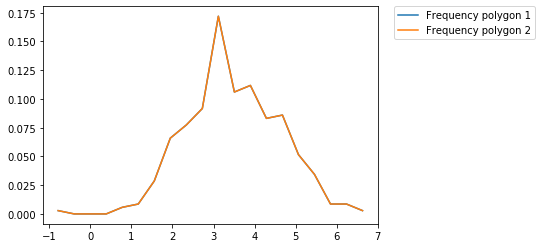

In [33]:
def create_hist(in_data, intervals_count, normalized = False):
    out_hist = [0] * intervals_count
    intervals_positions = [0] * intervals_count
    hist_step = (in_data[-1] - in_data[0]) / intervals_count
    cur_border = in_data[0] + hist_step
    cur_interval_index = 0
    in_data_len = len(in_data)
    
    for i in range(intervals_count):
        intervals_positions[i] = in_data[0] + hist_step * i

    for current_number in in_data:
        if current_number < cur_border:
            out_hist[cur_interval_index] += 1
        elif cur_interval_index < intervals_count - 1:
            cur_interval_index += 1
            cur_border += hist_step
    
    if normalized:
        for i in range(intervals_count):
            out_hist[i] /= in_data_len
            
    return out_hist, intervals_positions
    
hist, interval_positions = create_hist(sortedData2, 20, True)
print(20)
print(hist)
print(interval_positions)
plt.plot(interval_positions, hist, label="Frequency polygon 1")
np_hist, bin_edges = np.histogram(sortedData2, density=True)
print(np_hist)
print(bin_edges)
plt.plot(interval_positions, hist, label="Frequency polygon 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)

20
[0.00734333 0.         0.         0.01468665 0.02937331 0.02937331
 0.0807766  0.17623985 0.20561316 0.24232979 0.44794295 0.27904643
 0.29373308 0.22029981 0.22764314 0.13952321 0.09546325 0.02937331
 0.02937331 0.01468665]
[-7.836000e-01 -3.934050e-01 -3.210000e-03  3.869850e-01  7.771800e-01
  1.167375e+00  1.557570e+00  1.947765e+00  2.337960e+00  2.728155e+00
  3.118350e+00  3.508545e+00  3.898740e+00  4.288935e+00  4.679130e+00
  5.069325e+00  5.459520e+00  5.849715e+00  6.239910e+00  6.630105e+00
  7.020300e+00]


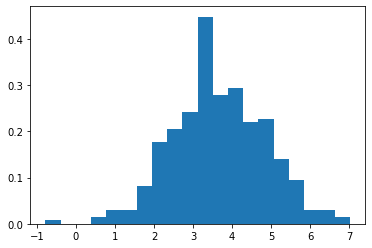